<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [ ]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: **`Math for 4th grade`**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [ ]:
df.columns

In [ ]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [ ]:
df.dropna(subset=['AVG_MATH_4_SCORE','ENROLL_4','TOTAL_REVENUE','AVG_READING_4_SCORE'],inplace=True)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [38]:
df['INSTRUCTION_PER_PERSON'] = df['INSTRUCTION_EXPENDITURE']/df['ENROLL_4']
df['INSTRUCTION_PER_PERSON_LOG'] = df['INSTRUCTION_PER_PERSON'].apply(np.log)

Final feature list: **Average Reading 4th Grade Score, Log Instruction Expenditure per Student**

Feature selection justification: **I chose both of these features because I believe that instruction expenditure per person significantly impacts student's learning experience compared to other expenditures per student. And the average reading score  gives a measurement of student academic capability.**

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 4th grade math score')

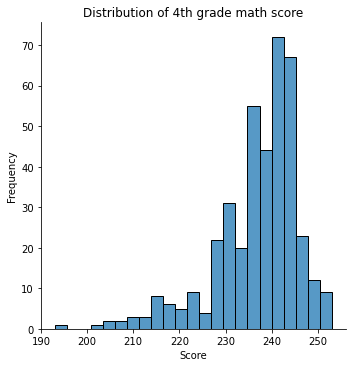

In [60]:
sns.displot(data=df,x='AVG_MATH_4_SCORE',kind='hist')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade math score')

Text(0.5, 1.0, 'Distribution of 4th grade math score over the years')

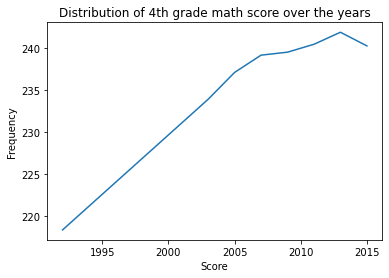

In [61]:
df.groupby('YEAR').AVG_MATH_4_SCORE.mean().plot()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade math score over the years')

Text(0.5, 1.0, 'Distribution of 4th grade math score over the years by state')

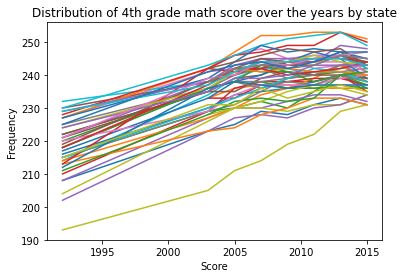

In [62]:
df.set_index('YEAR').groupby('STATE').AVG_MATH_4_SCORE.plot()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade math score over the years by state')

**Visualizing distribution of 4th grade average math score and the average 4th grade math score over time and by states.**

Visualization 2

Text(0, 0.5, 'Averag e 4th grade math score')

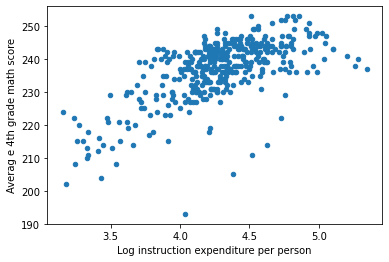

In [63]:
df.plot.scatter(x='INSTRUCTION_PER_PERSON_LOG',y='AVG_MATH_4_SCORE')
plt.xlabel('Log instruction expenditure per person')
plt.ylabel('Averag e 4th grade math score')

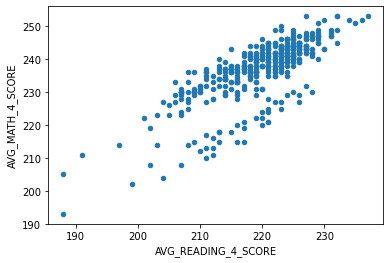

In [64]:
df.plot.scatter(x='AVG_READING_4_SCORE',y='AVG_MATH_4_SCORE')

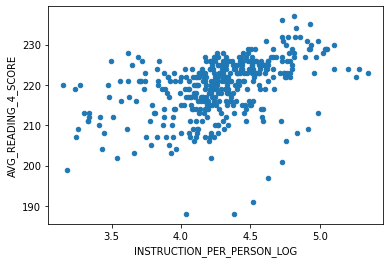

In [65]:
df.plot.scatter(x='INSTRUCTION_PER_PERSON_LOG',y='AVG_READING_4_SCORE')

**Visualizing the correlation between features and dependent variables.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [43]:
X = df[['AVG_READING_4_SCORE','INSTRUCTION_PER_PERSON_LOG']]
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [45]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [46]:
# create your model here
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

Intercept:  41.42085564407091
INSTRUCTION_PER_PERSON_LOG : 8.47569161087138
AVG_READING_4_SCORE : 0.7253901543349833
R-Squared:  0.7908389558503176
Root Mean Squared Error:  4.5949523719859755
Mean Absolute:  3.468745167664383


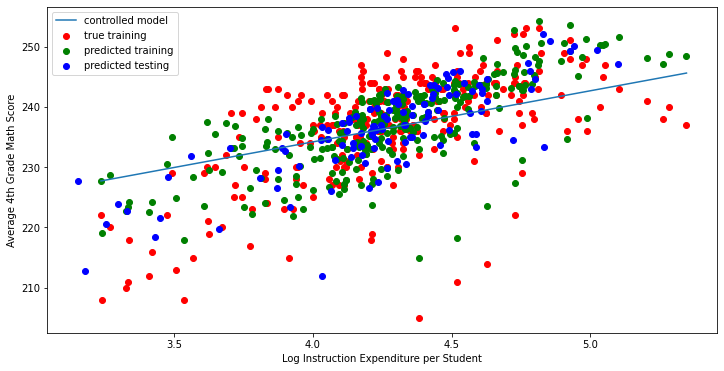

In [59]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_PER_PERSON_LOG'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel('Log Instruction Expenditure per Student')
plt.ylabel('Average 4th Grade Math Score')

print("Intercept: ", model.intercept_)
print("INSTRUCTION_PER_PERSON_LOG :", model.coef_[1])
print("AVG_READING_4_SCORE :", model.coef_[0])
print("R-Squared: ", model.score(X_test, y_test))
print("Root Mean Squared Error: ", np.mean((model.predict(X_test)-y_test)**2)**0.5)
print("Mean Absolute: ", np.mean(np.abs(model.predict(X_test)-y_test)))

<h2> Summary </h2>

I attempt to predict average 4th grade math score using log instruction expenditure per student and average 4th grade reading score. I used both of these features because I believe that instruction expenditure has a direct impact to students compared to other expenditure and average 4th grade reading score is a measure of general student academic capability. From the model, it appears that a unit increase in 4th grade average reading score will cause an increase in 4th grade average math score by 0.79 points. Meanwhile, a one percent increase in instruction expenditure per student will increase 4th grade average math score by 8.48 points. The R-Squared of the model indicates that roughly 79% of the variations in the model can be explained through the chosen variables. Also, the predicted score is on average off by 3.47 points from the actual score. To improve the model, I would like to use year as another variable as EDA suggests that the average 4th grade math score rises until around 2013, where scores started to drop.